In [79]:
#from google.colab import drive
#drive.mount('/content/drive/')

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d

smoothData = True
transmitterIDs = ['c', 'a', 'b']

def loadFiles(locationNumber):
  processedFiles = []
  for i in range(15):
    currentAngle = i * 2.5
    with open('loc' + str(locationNumber) + '-' + str(currentAngle) + '.log', 'r') as f:
      filedata = f.read()
      processedFiles.append(filedata)
  return processedFiles


def getRaw(files):
  allraws = []
  for i in range(len(files)):
    raws = []
    splitFile = files[i][54:].split('\n\n')
    splitFile = splitFile[1:len(splitFile)-1]
    for k in range(3):
      transmitterRSSIs = []
      for j in range(len(splitFile)):
        if splitFile[j][len(splitFile[j])-2] == transmitterIDs[k]:
          if(len(splitFile[j]) == 29):
            transmitterRSSIs.append(-int(splitFile[j][7:9]))
      raws.append(transmitterRSSIs)
    allraws.append(raws)
  return allraws #np.reshape(raws,(15,3))

/tmp/ipykernel_5641/2846725094.py:6: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


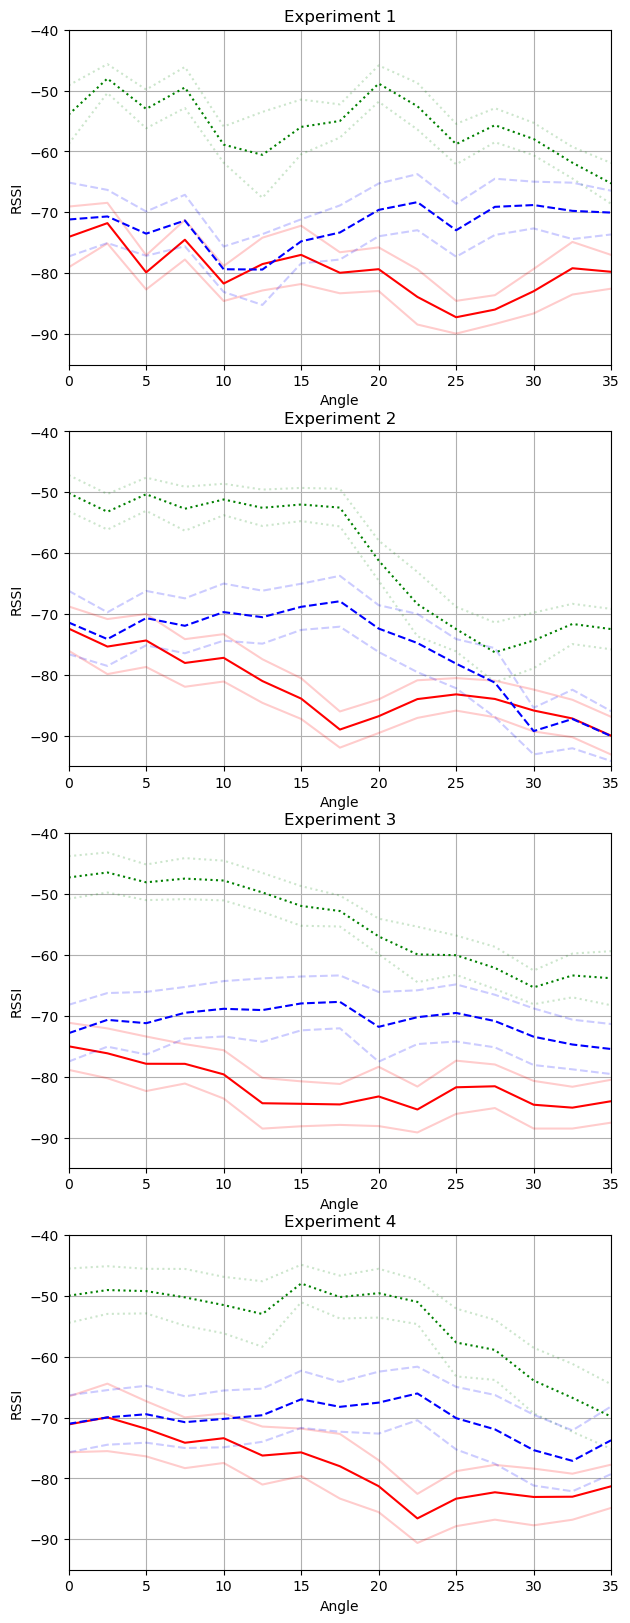

In [90]:
def plotraw(filenumber):
    rawdata = getRaw(loadFiles(filenumber))
    results_mean = [[],[],[]]
    results_std = [[],[],[]]
    for angle, angledata in enumerate(rawdata):
        for t, transmitterdata in enumerate(angledata):
            results_mean[t].append(np.mean(transmitterdata))
            results_std[t].append(np.std(transmitterdata))
    results_mean = np.array(results_mean)
    results_std = np.array(results_std)

    angles = np.linspace(0,35,15)
    for r,sd,col in zip(results_mean,results_std,['r','g:','b--']):
        plt.plot(angles,r,col)
        plt.plot(angles,r-sd,col,alpha=0.2)
        plt.plot(angles,r+sd,col,alpha=0.2)
    plt.xlabel('Angle')
    plt.ylabel('RSSI')
    plt.xlim([0,35])
    plt.ylim([-95,-40])
    plt.grid()

plt.figure(figsize=[7,20])
for i in range(1,5):
    plt.subplot(4,1,i)
    plt.title("Experiment %d" % i)
    plotraw(i)

In [4]:
plotAverages(loadFiles(1))

TypeError: data type 'str32' not understood

# LOCATION 2

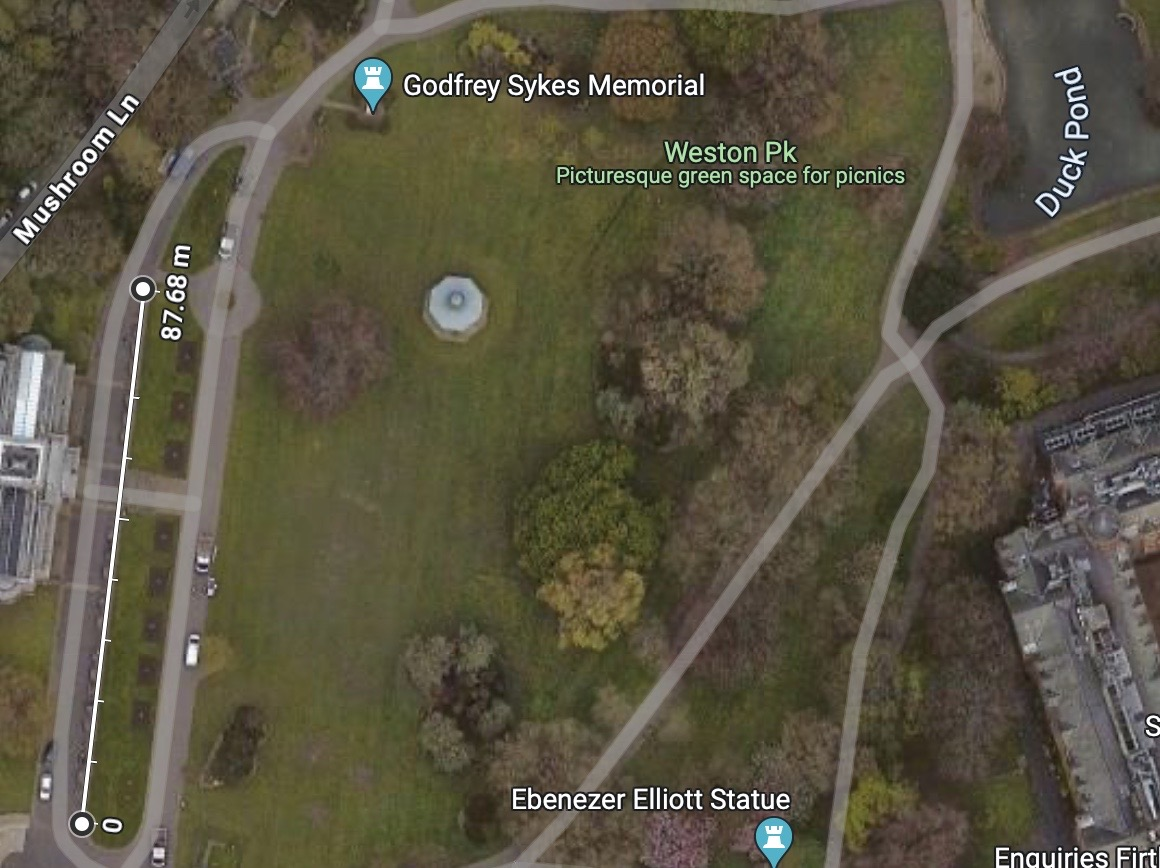

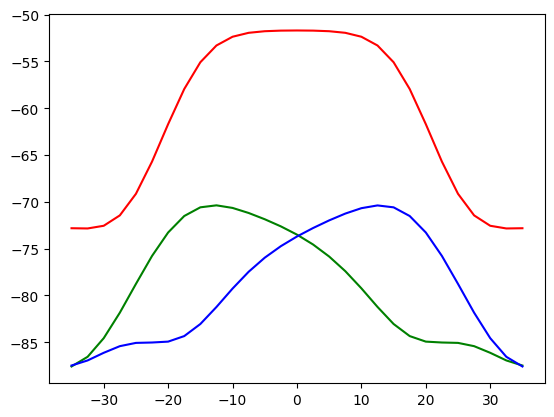

In [145]:
plotAverages(mirrorData(getAverages(loadFiles(2))))

# LOCATION 3

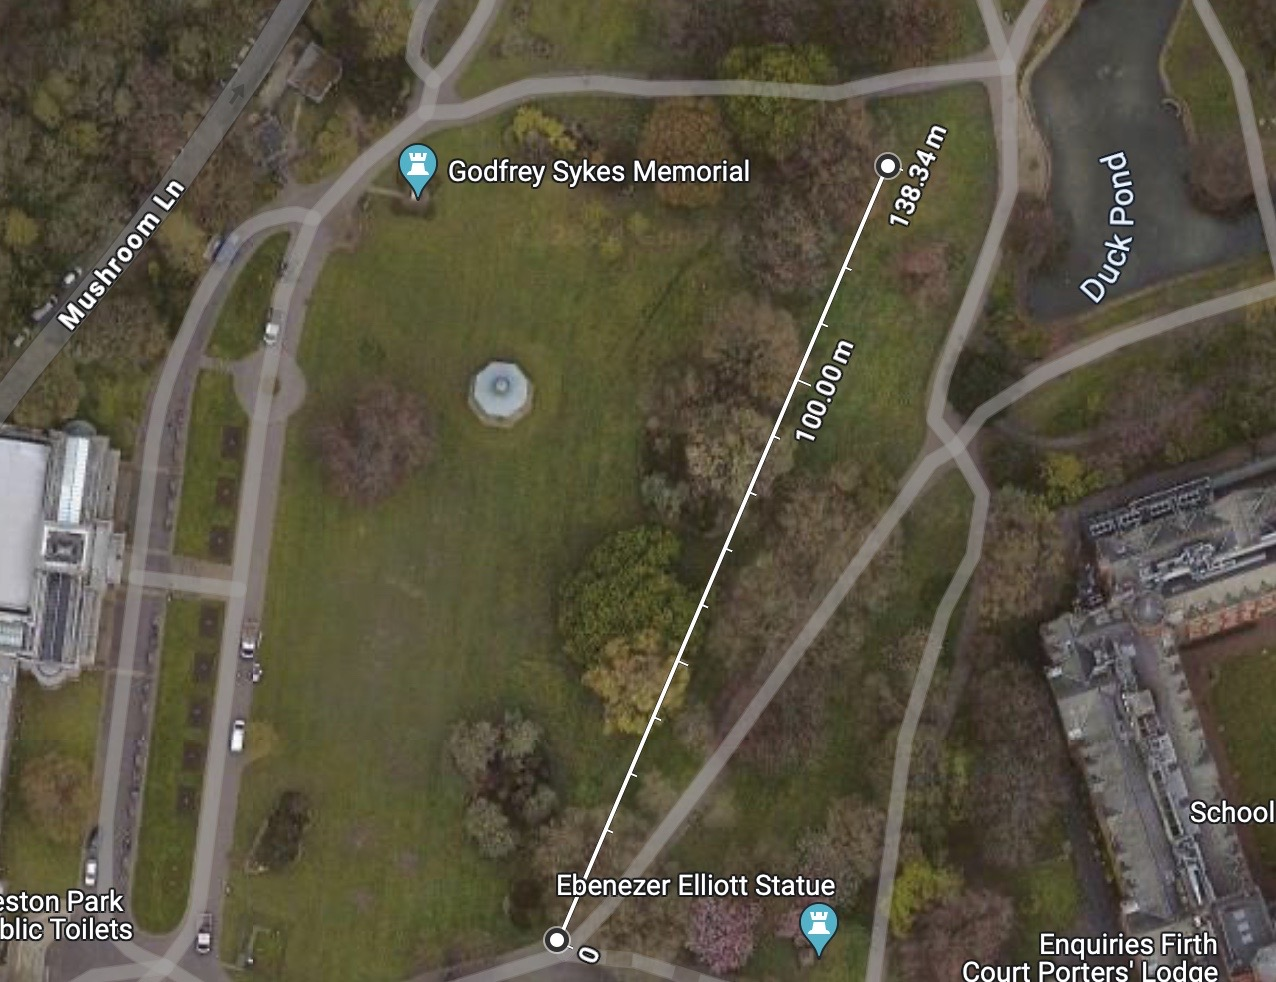

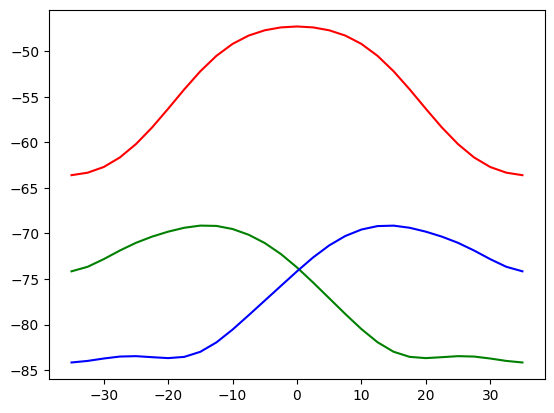

In [146]:
plotAverages(mirrorData(getAverages(loadFiles(3))))

# LOCATION 4

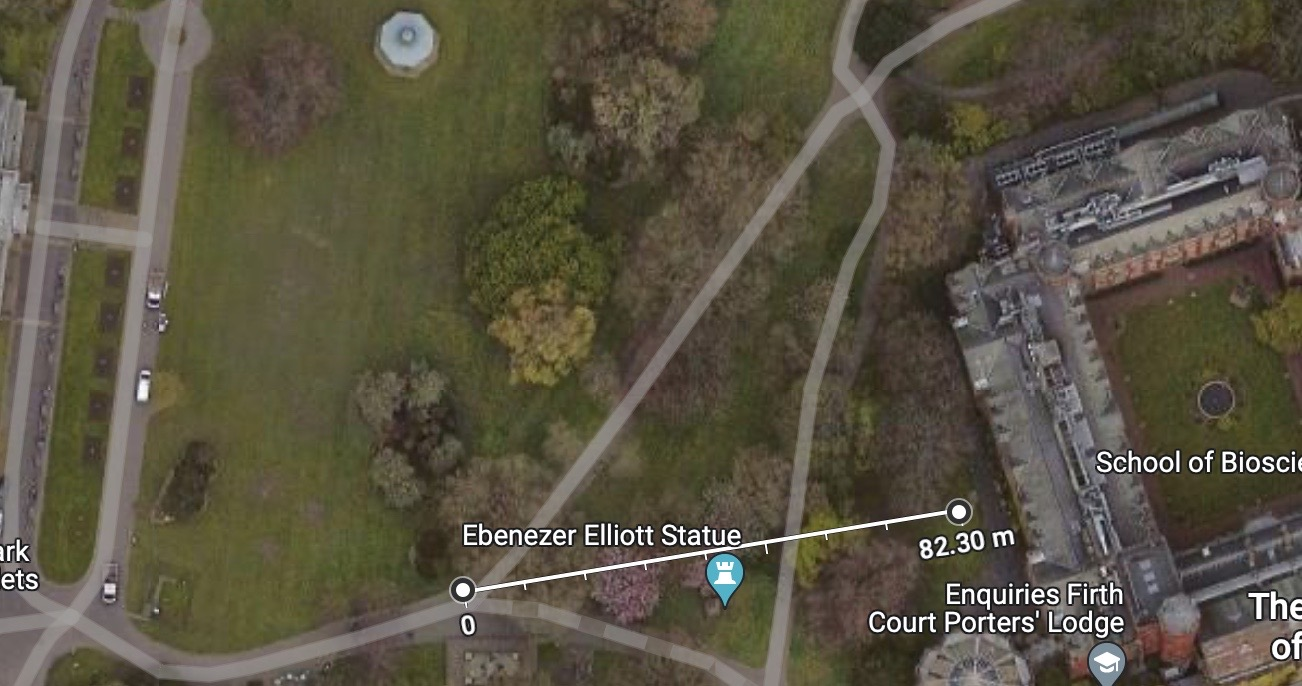

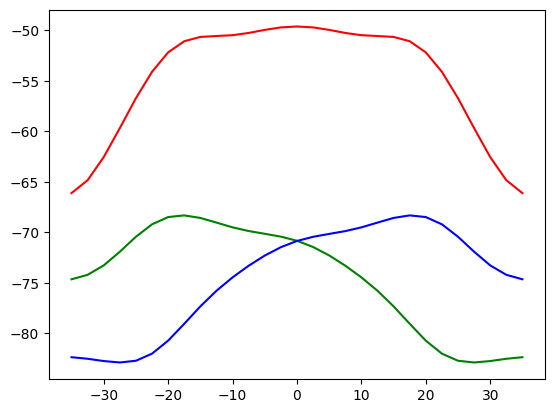

In [147]:
plotAverages(mirrorData(getAverages(loadFiles(4))))